In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dlsfunctions as dls
import initialization_data as init

In [2]:
def generate_bimodal_distribution(d, mean1, sigma1, mean2, sigma2, mie_fract):
    f1 = 1/(sigma1*np.sqrt(2*np.pi**2))*np.exp(-(d-mean1)**2/(2*sigma1**2))
    f1 = f1* dls.normalize(f1, 1, d[1] - d[0])
    
    f2 = 1/(sigma2*np.sqrt(2*np.pi**2))*np.exp(-(d-mean2)**2/(2*sigma2**2))
    f2 = f2 * dls.normalize(f2, 1, d[1] - d[0])
    
    f = f1 + f2
    f = f * dls.normalize(f, 1, d[1] - d[0])
    return f

In [3]:
d = init.get_distance()

mean1 = init.get_left_mean() + 1e-9
sigma1 = init.get_narrow_sigma()

mean2 = init.get_right_mean()
sigma2 = init.get_narrow_sigma()

c = init.c
m = init.m
beta = init.beta

f = generate_bimodal_distribution(d, mean1, sigma1, mean2, sigma2, c)

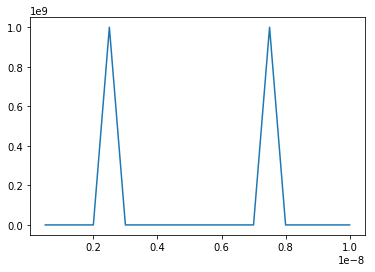

In [4]:
plt.plot(d,f)

In [5]:
dls.check_distribution_norm(f, d[1] - d[0])

1.0

In [8]:
time = init.get_log_time()
gamma = init.get_gamma()

In [9]:
theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time)

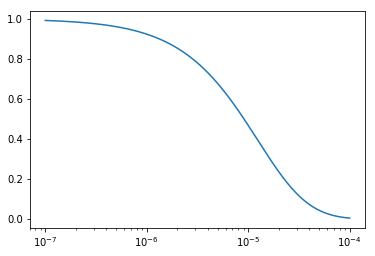

In [10]:
plt.semilogx(time, sim_data)

In [11]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [12]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.369, 0.374, 0.382, 0.395, 0.385, 0.366, 0.408, 0.352, 0.387,
       0.361, 0.397, 0.389, 0.352, 0.364, 0.388, 0.381, 0.388, 0.376,
       0.375, 0.388, 0.375, 0.392, 0.369, 0.362, 0.397, 0.382, 0.375,
       0.389, 0.386, 0.388, 0.363, 0.369, 0.368, 0.39 , 0.383, 0.359,
       0.333, 0.377, 0.402, 0.383, 0.364, 0.369, 0.345, 0.362, 0.363,
       0.354, 0.391, 0.371, 0.39 , 0.385, 0.39 , 0.4  , 0.374, 0.363,
       0.36 , 0.378, 0.414, 0.343, 0.39 , 0.363, 0.396, 0.374, 0.389,
       0.378, 0.362, 0.365, 0.377, 0.377, 0.397, 0.357, 0.369, 0.365,
       0.388, 0.383, 0.387, 0.369, 0.374, 0.354, 0.335, 0.378, 0.346,
       0.382, 0.391, 0.356, 0.371, 0.37 , 0.357, 0.378, 0.387, 0.36 ,
       0.358, 0.374, 0.374, 0.356, 0.383, 0.339, 0.391, 0.377, 0.399,
       0.365])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


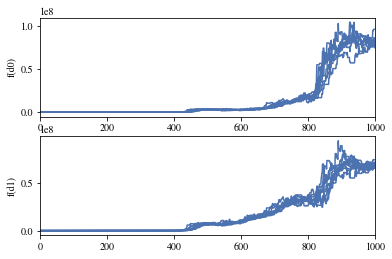

In [13]:
dls.view_burnin_plot(result, 0, 1)

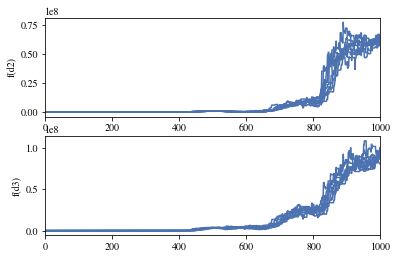

In [14]:
dls.view_burnin_plot(result, 2, 3)

In [15]:
chained_sampler = dls.chain(result, 850, ndim)

In [16]:
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,7.881893e+07,6.812127e+07,6.143073e+07,7.591701e+07,1.736811e+07,1.029339e+08,1.022859e+09,1.739669e+08,7.691077e+07,1.522824e+08,6.535002e+07,6.344904e+07,5.671605e+07,7.869324e+07,1.119549e+09,3.757568e+07,1.751391e+08,6.706900e+07,1.351644e+08,3.015078e+07


In [17]:
infer = np.zeros(20)
infer[0] = 7.881893e+07
infer[1] = 6.812127e+07
infer[2] = 5.671605e+07
infer[3] = 7.869324e+07
infer[4] = 1.119549e+09
infer[5] = 3.757568e+07
infer[6] = 1.751391e+08
infer[7] = 6.706900e+07
infer[8] = 1.351644e+08
infer[9] = 3.015078e+07
infer[10] = 6.143073e+07
infer[11] = 7.591701e+07
infer[12] = 1.736811e+07
infer[13] = 1.029339e+08
infer[14] = 1.022859e+09
infer[15] = 1.739669e+08
infer[16] = 7.691077e+07
infer[17] = 1.522824e+08
infer[18] = 6.535002e+07
infer[19] = 6.344904e+07

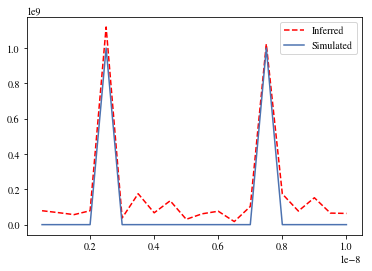

In [26]:
plt.plot(d, infer, 'r--', label='Inferred')
plt.plot(d, f, label='Simulated')
plt.legend()

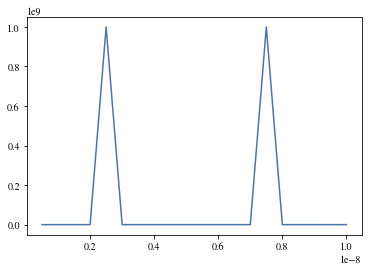

In [19]:
plt.plot(d, f)

In [20]:
beta_post = dls.get_beta(chained_sampler, ndim)

In [21]:
betaq = beta_post.quantile([0.5], axis=0)
betaq

,beta
0.5,1.018684


In [22]:
theta_infer = np.append(infer, 1.01864)
inferg2 = dls.g2(theta_infer, d, m, gamma, time)

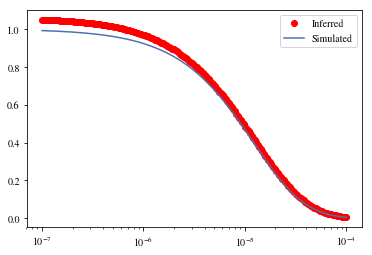

In [23]:
plt.semilogx(time, inferg2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='Simulated')
plt.legend()